In [63]:
]activate .

  Activating project at `~/Projects/Noticer.jl`


In [64]:
using PuzzleTools

In [65]:
words = PuzzleTools.Wordsets.unixwords();

In [66]:
using Distributions

In [67]:
using LinearAlgebra: normalize

In [68]:
dist = Multinomial(3, normalize([1, 2, 3], 1))

Multinomial{Float64, Vector{Float64}}(n=3, p=[0.16666666666666666, 0.3333333333333333, 0.5])

In [69]:
pdf(dist, [1, 2, 0])

0.05555555555555554

In [70]:
pdf(dist, [0, 0, 3])

0.12500000000000003

In [71]:
pdf(dist, [1, 0, 2])

0.12500000000000003

In [72]:
dist = Multinomial(5, normalize([1, 2, 3], 1))

Multinomial{Float64, Vector{Float64}}(n=5, p=[0.16666666666666666, 0.3333333333333333, 0.5])

In [73]:
pdf(dist, [0, 0, 5])

0.03125

In [74]:
pdf(dist, [1, 0, 4])

0.05208333333333332

In [75]:
0.5^5

0.03125

In [76]:
logpdf(dist, [1, 0, 4])

-2.954910279033736

In [77]:
dist = Multinomial(5, normalize([1, 0, 2, 3], 1))

Multinomial{Float64, Vector{Float64}}(n=5, p=[0.16666666666666666, 0.0, 0.3333333333333333, 0.5])

In [78]:
pdf(dist, [0, 0, 0, 5])

0.03125

On reflection, I'm not sure the multinomial distribution makes sense here. Let's go back to the idea of counting the number of 'm's in a set of words. It's clearly pretty interesting if all of our words have exactly 2 'm's. What if 4 out of 5 have exactly 2 'm's but the last has some other number? That might be interesting too, but does its interestingness (from a puzzle perspective) depend on how many 'm's that last word has? I'd argue that it doesn't. A count of 'm's of [2, 2, 2, 2, 5] is more unlikely (according to the multinomial distribution) than a count of [2, 2, 2, 2, 1] since few words have 5 'm's, but I don't think that actually matters from a puzzle perspective. In both cases, we have 4 of 5 words with some interesting feature (2 'm's) and 1 word without that feature. 

That seems to argue in favor of the original one-hot style from Collective.jl. In that case, "has 2 'm's" is a boolean feature, and the sample would be [true, true, true, true, false] regardless of whether we had 5 'm's or 1 in the last word. I think that's closer to what we actually want. 

In [79]:
dist = Binomial(5, 0.25)

Binomial{Float64}(n=5, p=0.25)

In [80]:
pdf(dist, 0)

0.23730468750000017

In [81]:
0.75^5

0.2373046875

In [82]:
pdf(dist, 5)

0.0009765625000000009

In [83]:
0.25^5

0.0009765625

In [84]:
pdf(dist, 2)

0.26367187500000017

In [85]:
function naive_pdf(dist, k)
    factorial(dist.n) / (factorial(k) * factorial(dist.n - k)) * dist.p^k * (1 - dist.p)^(dist.n - k)
end

naive_pdf (generic function with 1 method)

In [86]:
dist = Binomial(5, 0.25)

Binomial{Float64}(n=5, p=0.25)

In [87]:
naive_pdf(dist, 2)

0.263671875

In [88]:
using BenchmarkTools

In [89]:
@btime pdf($dist, 2)

  115.677 ns (0 allocations: 0 bytes)


0.26367187500000017

In [90]:
@btime logpdf($dist, 2)

  93.352 ns (0 allocations: 0 bytes)


-1.3330498466010776

In [91]:
@btime naive_pdf($dist, 2)

  7.730 ns (0 allocations: 0 bytes)


0.263671875

In [92]:
dist = Binomial(10, 0.25)

Binomial{Float64}(n=10, p=0.25)

In [93]:
@btime pdf($dist, 2)

  93.911 ns (0 allocations: 0 bytes)


0.28156757354736345

In [94]:
@btime naive_pdf($dist, 2)

  95.766 ns (0 allocations: 0 bytes)


0.2815675735473633

In [95]:
dist = Binomial(20, 0.25)

Binomial{Float64}(n=20, p=0.25)

In [96]:
@btime pdf($dist, 2)

  94.099 ns (0 allocations: 0 bytes)


0.06694780759971757

In [97]:
@btime naive_pdf($dist, 2)

  95.773 ns (0 allocations: 0 bytes)


0.06694780759971763

In [98]:
@btime pdf($dist, 10)

  95.471 ns (0 allocations: 0 bytes)


0.009922275279677708

In [99]:
@btime naive_pdf($dist, 10)

  168.711 ns (0 allocations: 0 bytes)


0.009922275279677706

In [100]:
dist = Binomial(1000, 0.25)

Binomial{Float64}(n=1000, p=0.25)

In [101]:
@btime pdf($dist, 500)

  95.809 ns (0 allocations: 0 bytes)


8.559791450762579e-65

In [102]:
@btime naive_pdf($dist, 500)

LoadError: OverflowError: 1000 is too large to look up in the table; consider using `factorial(big(1000))` instead

In [103]:
@btime Distributions.betalogpdf(1, 2, 3)

  29.015 ns (0 allocations: 0 bytes)


-Inf

In [104]:
@edit Distributions.betalogpdf(1, 2, 3)

In [105]:
using StatsBase

In [106]:
kldivergence([1, 0, 0], [1/3, 1/3, 1/3])

1.0986122886681098

In [107]:
kldivergence([1, 0, 0], normalize([1, 2, 3], 1))

1.791759469228055

In [108]:
kldivergence([0, 0, 1], normalize([1, 2, 3], 1))

0.6931471805599453

In [109]:
kldivergence([1, 0], [0.25, 0.75])

1.3862943611198906

In [110]:
using HypothesisTests: MultinomialLRTest, ChisqTest

In [111]:
MultinomialLRTest([1, 1, 1], normalize([1, 1, 1], 1))

Multinomial Likelihood Ratio Test
---------------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.333333, 0.333333, 0.333333]
    point estimate:          [0.333333, 0.333333, 0.333333]
    95% confidence interval: [(0.0, 1.0), (0.0, 1.0), (0.0, 1.0)]

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           1.0000

Details:
    Sample size:        3
    statistic:          0.0
    degrees of freedom: 2
    residuals:          [0.0, 0.0, 0.0]
    std. residuals:     [0.0, 0.0, 0.0]


In [112]:
MultinomialLRTest([1, 0, 10], normalize([1, 1, 1], 1))

Multinomial Likelihood Ratio Test
---------------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.333333, 0.333333, 0.333333]
    point estimate:          [0.0909091, 0.0, 0.909091]
    95% confidence interval: [(0.0, 0.2467), (0.0, 0.1558), (0.8182, 1.0)]

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           NaN

Details:
    Sample size:        11
    statistic:          NaN
    degrees of freedom: 2
    residuals:          [-1.39262, -1.91485, 3.30748]
    std. residuals:     [-1.70561, -2.34521, 4.05081]


In [113]:
ChisqTest([1, 1, 1], normalize([1, 1, 1], 1))

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.333333, 0.333333, 0.333333]
    point estimate:          [0.333333, 0.333333, 0.333333]
    95% confidence interval: [(0.0, 1.0), (0.0, 1.0), (0.0, 1.0)]

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           1.0000

Details:
    Sample size:        3
    statistic:          0.0
    degrees of freedom: 2
    residuals:          [0.0, 0.0, 0.0]
    std. residuals:     [0.0, 0.0, 0.0]


In [114]:
ChisqTest([0, 1, 5], normalize([1, 1, 1], 1))

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.333333, 0.333333, 0.333333]
    point estimate:          [0.0, 0.166667, 0.833333]
    95% confidence interval: [(0.0, 0.2781), (0.0, 0.4448), (0.6667, 1.0)]

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0302

Details:
    Sample size:        6
    statistic:          7.0
    degrees of freedom: 2
    residuals:          [-1.41421, -0.707107, 2.12132]
    std. residuals:     [-1.73205, -0.866025, 2.59808]


In [115]:
ChisqTest([1, 4], [0.75, 0.25])

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.75, 0.25]
    point estimate:          [0.2, 0.8]
    95% confidence interval: [(0.0, 0.5257), (0.6, 1.0)]

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0045

Details:
    Sample size:        5
    statistic:          8.066666666666666
    degrees of freedom: 1
    residuals:          [-1.42009, 2.45967]
    std. residuals:     [-2.84019, 2.84019]


In [116]:
dist = Binomial(5, 0.25)
pdf(dist, 4) + pdf(dist, 5)

0.015625000000000007

In [117]:
using HypothesisTests: pvalue

In [118]:
pvalue(ChisqTest([0, 0, 5, 0], normalize([1, 3, 1, 0.5], 1)))

5.133013955787431e-5

In [119]:
pvalue(ChisqTest([0, 0, 4, 1], normalize([1, 3, 1, 0.5], 1)))

0.001995790028753647

In [120]:
using HypothesisTests, Distributions

In [124]:
ExactOneSampleKSTest([5, 0], Categorical([0.01, 0.99]))

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.5000

Details:
    number of observations:   2


In [125]:
OneSampleADTest([5, 0], Categorical([0.25, 0.75]))

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0003

Details:
    number of observations:   2
    sample mean:              2.5
    sample SD:                3.5355339059327378
    A² statistic:             Inf


In [132]:
OneSampleADTest([1, 4], Categorical([0.5, 0.5]))

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0003

Details:
    number of observations:   2
    sample mean:              2.5
    sample SD:                2.1213203435596424
    A² statistic:             Inf


In [133]:
dist = Categorical([0.5, 0.5])

Categorical{Float64, Vector{Float64}}(support=Base.OneTo(2), p=[0.5, 0.5])

In [134]:
pdf(dist, 1)

0.5

In [135]:
pdf(dist, 2)

0.5

In [136]:
pdf(dist, 0)

0.0

In [139]:
dist = Categorical([0.75, 0.25])

Categorical{Float64, Vector{Float64}}(support=Base.OneTo(2), p=[0.75, 0.25])

In [142]:
logcdf(dist, 1)

-0.2876820724517809

In [143]:
logccdf(dist, 2)

-Inf

In [144]:
?logccdf

search: logccdf invlogccdf



```
logccdf(d::UnivariateDistribution, x::Real)
```

The logarithm of the complementary cumulative function values evaluated at x, i.e. `log(ccdf(x))`.


In [138]:
OneSampleADTest([1, 0, 0, 0], Categorical([0.75, 0.25]) )

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0001

Details:
    number of observations:   4
    sample mean:              0.25
    sample SD:                0.5
    A² statistic:             Inf


In [145]:
?Multinomial

search: Multinomial MultinomialLRT MultinomialLRTest DirichletMultinomial



The [Multinomial distribution](http://en.wikipedia.org/wiki/Multinomial_distribution) generalizes the *binomial distribution*. Consider n independent draws from a Categorical distribution over a finite set of size k, and let $X = (X_1, ..., X_k)$ where $X_i$ represents the number of times the element $i$ occurs, then the distribution of $X$ is a multinomial distribution. Each sample of a multinomial distribution is a k-dimensional integer vector that sums to n.

The probability mass function is given by

$$
f(x; n, p) = \frac{n!}{x_1! \cdots x_k!} \prod_{i=1}^k p_i^{x_i},
\quad x_1 + \cdots + x_k = n
$$

```julia
Multinomial(n, p)   # Multinomial distribution for n trials with probability vector p
Multinomial(n, k)   # Multinomial distribution for n trials with equal probabilities
                    # over 1:k
```


In [146]:
pdf(Multinomial(5, [0.25, 0.75]), [5, 0])

0.0009765625

In [147]:
pdf(Binomial(5, 0.25), 5)

0.0009765625000000009

In [182]:
using Combinatorics
using Random

In [149]:
?permutations

search: permutations ExactPermutationTest multiset_permutations



```
permutations(a)
```

Generate all permutations of an indexable object `a` in lexicographic order. Because the number of permutations can be very large, this function returns an iterator object. Use `collect(permutations(a))` to get an array of all permutations.

---

```
permutations(a, t)
```

Generate all size `t` permutations of an indexable object `a`.


In [163]:
?multiexponents

search: multiexponents



```
multiexponents(m, n)
```

Returns the exponents in the multinomial expansion (x₁ + x₂ + ... + xₘ)ⁿ.

For example, the expansion (x₁ + x₂ + x₃)² = x₁² + x₁x₂ + x₁x₃ + ... has the exponents:

```
julia> collect(multiexponents(3, 2))

6-element Array{Any,1}:
 [2, 0, 0]
 [1, 1, 0]
 [1, 0, 1]
 [0, 2, 0]
 [0, 1, 1]
 [0, 0, 2]
```


In [156]:
length(multiexponents(26, 9))

52451256

In [187]:
using Plots

In [222]:
m = 5
n = 4
expected = collect(multiexponents(m, n))

70-element Vector{Any}:
 [4, 0, 0, 0, 0]
 [3, 1, 0, 0, 0]
 [3, 0, 1, 0, 0]
 [3, 0, 0, 1, 0]
 [3, 0, 0, 0, 1]
 [2, 2, 0, 0, 0]
 [2, 1, 1, 0, 0]
 [2, 1, 0, 1, 0]
 [2, 1, 0, 0, 1]
 [2, 0, 2, 0, 0]
 [2, 0, 1, 1, 0]
 [2, 0, 1, 0, 1]
 [2, 0, 0, 2, 0]
 ⋮
 [0, 0, 2, 2, 0]
 [0, 0, 2, 1, 1]
 [0, 0, 2, 0, 2]
 [0, 0, 1, 3, 0]
 [0, 0, 1, 2, 1]
 [0, 0, 1, 1, 2]
 [0, 0, 1, 0, 3]
 [0, 0, 0, 4, 0]
 [0, 0, 0, 3, 1]
 [0, 0, 0, 2, 2]
 [0, 0, 0, 1, 3]
 [0, 0, 0, 0, 4]

In [223]:
samples = map(1:10000) do i
#     counts = zeros(Int, m)
#     for i in 1:m
#         counts[i] = rand(1:(n - sum(counts)))
#         if sum(counts) == n
#             break
#         end
#     end
#     shuffle!(counts)
#     counts
        
    
#     counts = zeros(Int, m)
#     for i in 1:n
#         counts[rand(1:m)] += 1
#     end
#     counts
    
#     bars = rand(1:(n + 1), (m - 1))
#     sort!(bars)
#     vcat(bars[1] - 1, bars[2:end] .- bars[1:end-1], n + 1 - bars[end])
    
    rand(Multinomial(n, normalize(ones(m), 1)))
end

10000-element Vector{Vector{Int64}}:
 [1, 0, 0, 0, 3]
 [2, 0, 0, 1, 1]
 [1, 1, 0, 1, 1]
 [1, 0, 3, 0, 0]
 [0, 0, 3, 1, 0]
 [1, 1, 1, 1, 0]
 [1, 0, 0, 3, 0]
 [0, 1, 1, 1, 1]
 [0, 2, 1, 0, 1]
 [0, 1, 1, 0, 2]
 [1, 2, 0, 0, 1]
 [2, 1, 0, 1, 0]
 [0, 2, 0, 1, 1]
 ⋮
 [1, 0, 0, 1, 2]
 [0, 1, 1, 2, 0]
 [0, 1, 3, 0, 0]
 [0, 2, 1, 0, 1]
 [0, 0, 3, 0, 1]
 [0, 1, 0, 2, 1]
 [0, 0, 1, 2, 1]
 [0, 1, 3, 0, 0]
 [1, 0, 1, 1, 1]
 [0, 1, 2, 0, 1]
 [1, 0, 0, 1, 2]
 [0, 0, 2, 1, 1]

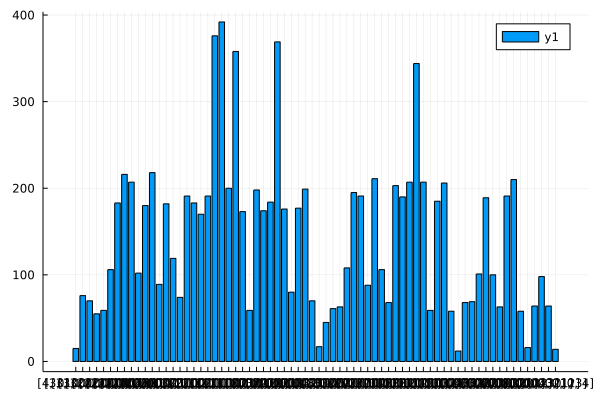

In [224]:
bar([count(==(x), samples) for x in expected], xticks=(1:length(expected), string.(expected)))

In [225]:
dist

Categorical{Float64, Vector{Float64}}(support=Base.OneTo(2), p=[0.75, 0.25])

In [226]:
dist = Multinomial(2, [0.5, 0.5])

Multinomial{Float64, Vector{Float64}}(n=2, p=[0.5, 0.5])

In [227]:
dist.n

2

In [228]:
methodswith(typeof(dist), supertypes=true)

[1] length(d::Multinomial) in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/multivariate/multinomial.jl:45
[2] length(s::Sampleable{Multivariate}) in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/common.jl:56
[3] length(s::Sampleable) in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/common.jl:54
[4] cor(d::MultivariateDistribution) in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/multivariates.jl:91
[5] cov(d::Multinomial{T, TV} where TV<:AbstractVector{T}) where T<:Real in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/multivariate/multinomial.jl:77
[6] entropy(d::Multinomial) in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/multivariate/multinomial.jl:120
[7] entropy(d::MultivariateDistribution, b::Real) in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/multivariates.jl:77
[8] kldivergence(P::Distribution{V}, Q::Distribution{V}; kwargs...) where V<:VariateForm in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/functionals.jl:29
[9] kurtosis(d::Distribution, correction::Bool) in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/univariates.jl:257
[10] loglikelihood(d::Distribution{ArrayLikeVariate{N}}, x::AbstractArray{<:AbstractArray{<:Real, N}}) where N in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/common.jl:440
[11] loglikelihood(d::Distribution{ArrayLikeVariate{N}}, x::AbstractArray{<:Real, N}) where N in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/common.jl:422
[12] loglikelihood(d::Distribution{ArrayLikeVariate{N}}, x::AbstractArray{<:Real, M}) where {N, M} in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/common.jl:427
[13] mean(d::Multinomial) in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/multivariate/multinomial.jl:62
[14] var(d::Multinomial{T, TV} where TV<:AbstractVector{T}) where T<:Real in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/multivariate/multinomial.jl:64
[15] rand!(rng::AbstractRNG, s::Sampleable{ArrayLikeVariate{N}}, x::AbstractArray{<:AbstractArray{<:Real, N}}) where N in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/genericrand.jl:122
[16] rand!(rng::AbstractRNG, s::Sampleable{ArrayLikeVariate{N}}, x::AbstractArray{<:AbstractArray{<:Real, N}}, allocate::Bool) where N in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/genericrand.jl:139
[17] rand!(rng::AbstractRNG, s::Sampleable{ArrayLikeVariate{N}}, x::AbstractArray{<:Real, N}) where N in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/genericrand.jl:83
[18] rand!(rng::AbstractRNG, s::Sampleable{ArrayLikeVariate{N}}, x::AbstractArray{<:Real, M}) where {N, M} in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/genericrand.jl:94
[19] rand!(rng::AbstractRNG, s::Sampleable, X::AbstractArray) in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/genericrand.jl:78
[20] rand!(s::Sampleable{ArrayLikeVariate{N}}, x::AbstractArray{<:AbstractArray{<:Real, N}}, allocate::Bool) where N in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/genericrand.jl:132
[21] rand!(s::Sampleable, X::AbstractArray) in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/genericrand.jl:77
[22] ==(s1::A, s2::B; kwargs...) where {A<:Sampleable, B<:Sampleable} in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/common.jl:93
[23] convert(::Type{Multinomial{T, TV} where TV<:AbstractVector{T}}, d::Multinomial{T, TV} where TV<:AbstractVector{T}) where T<:Real in Distributions at /home/rdeits/.julia/packages/Distributions/vR2pk/src/multivariate/multinomial.jl:57
[24] convert(::Type{Multinomial{T, TV} where TV<:AbstractVector{T}}, d::Multinomial) where T<:Real in Distributions at /home/rdeits/.ju

In [229]:

function multinomial_exact_test(dist::Multinomial, observed_counts::AbstractVector{<:Integer})
    observed_pdf = pdf(dist, observed_counts)
    permutations_to_consider = multiexponents(length(observed_counts), dist.n)
    sum(permutations_to_consider) do sample
        p = pdf(dist, sample)
        if p <= observed_pdf
            p
        else
            zero(typeof(p))
        end
    end
end

function multinomial_monte_carlo_test(dist::Multinomial, observed_counts::AbstractVector{<:Integer}, n_samples=1_000_000)
    observed_pdf = pdf(dist, observed_counts)
    n_more_extreme_samples = 0

    for i in 1:n_samples
        sample = rand(dist)
        if sample != observed_counts && pdf(dist, sample) <= observed_pdf
            n_more_extreme_samples += 1
        end
    end
    observed_pdf + n_more_extreme_samples / n_samples
end

multinomial_monte_carlo_test (generic function with 2 methods)

In [237]:
dist = Multinomial(6, normalize([1,2,3], 1))

obs = [0, 0, 6]

3-element Vector{Int64}:
 0
 0
 6

In [238]:
multinomial_exact_test(dist, obs)

0.07773919753086422

In [239]:
multinomial_monte_carlo_test(dist, obs)

0.078044

In [240]:
subsets

LoadError: UndefVarError: subsets not defined

In [244]:
length(combinations(1:18, 6))

18564

In [243]:
?combinations

search: combinations multiset_combinations CoolLexCombinations



```
combinations(a, n)
```

Generate all combinations of `n` elements from an indexable object `a`. Because the number of combinations can be very large, this function returns an iterator object. Use `collect(combinations(a, n))` to get an array of all combinations.

---

```
combinations(a)
```

Generate combinations of the elements of `a` of all orders. Chaining of order iterators is eager, but the sequence at each order is lazy.
